# Final Project
This demo file shows the preliminary knowledge for the final project.

## Preprocessing data
Preprocessing will include clean data, lower docs, tokenization, filtering, etc. The final goal of preprocessing is to build a vocab with the given corpus, so that you could vectorize your docs with bag-of-words.

### Fetch the raw data from the 20newsgroup corpora

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# we load both training and testing splits as our final project mainly focuses on the unsupervised setting. 
raw_dataset = fetch_20newsgroups(subset='all', shuffle=False)
print(raw_dataset.data[0])

From: cubbie@garnet.berkeley.edu (                               )
Subject: Re: Cubs behind Marlins? How?
Article-I.D.: agate.1pt592$f9a
Organization: University of California, Berkeley
Lines: 12
NNTP-Posting-Host: garnet.berkeley.edu


gajarsky@pilot.njin.net writes:

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

       This season so far, Morgan and Guzman helped to lead the Cubs
       at top in ERA, even better than THE rotation at Atlanta.
       Cubs ERA at 0.056 while Braves at 0.059. We know it is early
       in the season, we Cubs fans have learned how to enjoy the
       short triumph while it is still there.



In [3]:
# Sklearn already implements an interface for this step.
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)


In [4]:
corpus = dataset.data # save as the raw docs
labels = dataset.target # labels for clustering evaluation or supervised tasks
print(len(corpus), len(labels))
print(labels)
print(dataset.target_names)

18846 18846
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [9]:
import pandas as pd

labeled_docs = {
    'doc': dataset.data, 
    'label': [dataset.target_names[x] for x in dataset.target]
}

corpus_df = pd.DataFrame(labeled_docs)
corpus_df.head(5)

,doc,label
0,\nmorgan and guzman will have era's 1 run high...,rec.sport.baseball
1,"Well, I just got my Centris 610 yesterday. It...",comp.sys.mac.hardware
2,Archive-name: cryptography-faq/part10\nLast-mo...,sci.crypt
3,To the best of my knowledge there aren't any p...,comp.sys.mac.hardware
4,\n\nI think that domestication will change beh...,alt.atheism


### CountVectorizer is an sklearn method that converts a collection of text documents to a matrix of token counts. 
Read the argument descriptions [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to understand what preprocessing and tokenization steps are applied by default.

[Here](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) is the legit answer key.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()


,doc,label
0,\nmorgan and guzman will have era's 1 run high...,rec.sport.baseball
1,"Well, I just got my Centris 610 yesterday. It...",comp.sys.mac.hardware
2,Archive-name: cryptography-faq/part10\nLast-mo...,sci.crypt
3,To the best of my knowledge there aren't any p...,comp.sys.mac.hardware
4,\n\nI think that domestication will change beh...,alt.atheism


### Clean the raw data

In [6]:
# Let's show the first 10 documents
for i in range(10):
    doc = corpus[i]
    category = dataset.target_names[labels[i]]
    print("The {}-th document sent by {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th document sent by rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th document sent by comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to 

In [7]:
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')

# from nltk.stem import 	WordNetLemmatizer
# wordnet_lemmatizer = WordNetLemmatizer()
# text = "good best better bad worse worst"
# tokenization = nltk.word_tokenize(text)
# for w in tokenization:
#     print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))  

# words = ["good", "bad", "better", "best", "worse", "worst"]
 
# for w in words:
#     print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))  

### Tokenization

In [12]:
# So, apporently, we need do more Pre-processing step
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from pprint import pprint

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        #lower the words
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remove digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        # you could always add some new preprocessing here
        yield doc

doc1 = remove_stopwords(corpus[0])
doc2 = preprocess_string(corpus[0])       #use gensim's preprocess function
doc3 = next(pre_processing([corpus[0]]))  #defined preprocess function
print("original document as string of words: ", dataset.data[0])
print("\nremoved stop words (still a string): ", doc1)
print("\n=========================")
print("\nusing gensim's preprocess function (tokenized list):", doc2)
print("\nusing user-defined preprocess function (tokenized list): ", doc3)

original document as string of words:  
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

removed stop words (still a string):  morgan guzman era's 1 run higher year, cubs idiots pitch harkey hibbard. castillo won't good (i think he's stud pitcher)


using gensim's preprocess function (tokenized list): ['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']

using user-defined preprocess function (tokenized list):  ['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


### Build vocab

In [13]:
# Let's first get a new corpus by using one tokenization method above

# for illustration purpose, we only take the first 1000 docs from original corpus
# using gensim's preprocess_string
corpus1 = [preprocess_string(doc) for doc in corpus[:1000]]
print(corpus1[0]) 

print("\nNumber of docs: ", len(corpus1))

# Then we build the vocab -> get a dict freqs w/ word:frequency
freqs = defaultdict(int)

# corpus1 is list of docs where each doc is a list of tokens/words
for doc in corpus1:
    for w in doc:
        freqs[w] += 1
print("Number of unique words: ", len(freqs)) 
vocab = [w for w in freqs if freqs[w]>1]
print("Number of words with frequency>1: ", len(vocab)) 

['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']

Number of docs:  1000
Number of unique words:  11736
Number of words with frequency>1:  6309


In [15]:
{k: v for k, v in 
 sorted(freqs.items(), key=lambda item: item[1],reverse=False)}

{'harkei': 1,
 'hibbard': 1,
 'castillo': 1,
 'stud': 1,
 'rutger': 1,
 'appolog': 1,
 'backlog': 1,
 'nosi': 1,
 'dissappiont': 1,
 'tojump': 1,
 'lambro': 1,
 'callimaho': 1,
 'cryptanalyt': 1,
 'deavour': 1,
 'artech': 1,
 'dedham': 1,
 'frie': 1,
 'hin': 1,
 'hinslei': 1,
 'hod': 1,
 'hodg': 1,
 'ture': 1,
 'burnett': 1,
 'houghton': 1,
 'mifflin': 1,
 'codebreak': 1,
 'macmillan': 1,
 'hardcov': 1,
 'koz': 1,
 'kozaczuk': 1,
 'kullback': 1,
 'sinkov': 1,
 'elementari': 1,
 'assoc': 1,
 'welchman': 1,
 'mcgraw': 1,
 'yardl': 1,
 'yardlei': 1,
 'bek': 1,
 'beker': 1,
 'brassard': 1,
 'spinger': 1,
 'kob': 1,
 'koblitz': 1,
 'kon': 1,
 'konheim': 1,
 'primer': 1,
 'matya': 1,
 'wayn': 1,
 'mathematician': 1,
 'rowman': 1,
 'littlefield': 1,
 'pfl': 1,
 'pfleeger': 1,
 'prentic': 1,
 'pri': 1,
 'rue': 1,
 'rueppel': 1,
 'sal': 1,
 'saloma': 1,
 'welsh': 1,
 'claredon': 1,
 'ang': 1,
 'angluin': 1,
 'lichtenstein': 1,
 'provabl': 1,
 'beth': 1,
 'dav': 1,
 'davio': 1,
 'goethal': 1,
 '

### Visualize statistical information

Text(0, 0.5, 'Count')

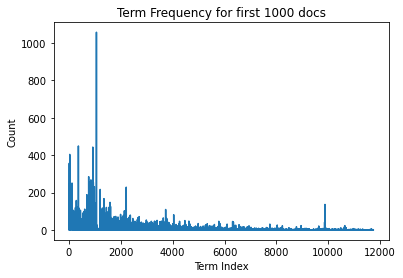

In [43]:
# visualize term frequency distribution 
tf_x = list(freqs.keys())
tf_y = [freqs[i] for i in freqs]

plt.plot(tf_y)
plt.title("Term Frequency for first 1000 docs")
plt.xlabel("Term Index")
plt.ylabel("Count")

In [16]:
# get number of words per doc
word_count = list()
word_count = [len(doc) for doc in corpus1]

print("Corpus1 statistics")
print("Min doc length: ", min(word_count))
print("Max doc length: ", max(word_count))
print("Mean doc length: ", np.mean(word_count))
print("Standard deviation of doc length: ", np.std(word_count))

Corpus1 statistics
Min doc length:  0
Max doc length:  3940
Mean doc length:  82.161
Standard deviation of doc length:  216.25780235404224


Text(0.5, 1.0, 'Document Length')

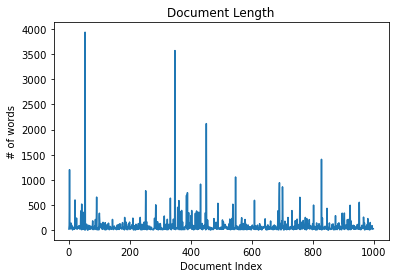

In [17]:
plt.plot(word_count)
plt.xlabel("Document Index")
plt.ylabel("# of words")
plt.title("Document Length")

In [49]:
# A more efficient way is to use gensim.corpora

# genshin.coropora.Dictionary() converts corpus to list of vectors
dictionary = corpora.Dictionary(corpus1)

print(dictionary) # key=index aka token_id, value=token
print(type(dictionary))

#Collection frequencies: token_id -> how many instances of this token are contained in the documents.
# key=index
dictionary.cfs

#Document frequencies: token_id -> how many documents contain this token.
dictionary.dfs


Dictionary(11736 unique tokens: ['castillo', 'cub', 'era', 'good', 'guzman']...)
<class 'gensim.corpora.dictionary.Dictionary'>


{9: 3,
 4: 2,
 2: 9,
 12: 150,
 7: 30,
 16: 247,
 1: 39,
 8: 7,
 10: 17,
 5: 1,
 6: 1,
 0: 1,
 15: 56,
 3: 227,
 14: 357,
 13: 1,
 11: 12,
 44: 134,
 27: 4,
 91: 10,
 81: 67,
 87: 47,
 65: 106,
 62: 114,
 34: 20,
 69: 1,
 76: 21,
 20: 1,
 19: 30,
 77: 5,
 38: 9,
 85: 220,
 53: 404,
 17: 2,
 22: 1,
 74: 60,
 46: 24,
 39: 12,
 60: 1,
 35: 43,
 61: 62,
 66: 143,
 79: 360,
 72: 44,
 26: 19,
 47: 76,
 37: 134,
 63: 7,
 30: 45,
 28: 225,
 57: 6,
 23: 72,
 33: 55,
 64: 5,
 82: 65,
 24: 15,
 90: 43,
 18: 7,
 50: 65,
 88: 3,
 49: 58,
 40: 22,
 29: 10,
 83: 146,
 78: 31,
 36: 1,
 54: 25,
 75: 7,
 86: 35,
 59: 54,
 55: 6,
 70: 47,
 56: 22,
 68: 6,
 51: 2,
 25: 10,
 21: 24,
 48: 68,
 52: 26,
 31: 106,
 43: 19,
 32: 7,
 71: 58,
 80: 1,
 89: 2,
 84: 218,
 73: 63,
 42: 25,
 41: 38,
 45: 96,
 58: 58,
 67: 74,
 120: 13,
 220: 19,
 277: 37,
 457: 20,
 568: 14,
 214: 11,
 542: 53,
 631: 4,
 489: 21,
 364: 18,
 536: 128,
 548: 40,
 581: 59,
 452: 27,
 428: 87,
 126: 123,
 473: 69,
 381: 3,
 416: 72,
 576:

In [19]:
pprint(dictionary.token2id) #prettyprint sorted value : key (it's index)

{'aaa': 8381,
 'aaltern': 5332,
 'aamir': 1631,
 'aaron': 9895,
 'aask': 9204,
 'ab': 6611,
 'abab': 6747,
 'abandon': 1886,
 'abba': 6932,
 'abbott': 4665,
 'abc': 7012,
 'abd': 4686,
 'abdullah': 4640,
 'aben': 3153,
 'abhin': 5425,
 'abhor': 5141,
 'abi': 5505,
 'abid': 8456,
 'abil': 1887,
 'abl': 1023,
 'ablil': 10506,
 'abod': 6933,
 'abolish': 5783,
 'abolit': 7804,
 'abomb': 8538,
 'abomin': 3719,
 'abort': 4554,
 'abound': 7611,
 'abraham': 10886,
 'abras': 9218,
 'abridg': 92,
 'abroad': 3720,
 'absenc': 7311,
 'absolut': 2138,
 'absolutei': 1578,
 'absorb': 2345,
 'abstract': 93,
 'absurd': 8139,
 'abu': 94,
 'abund': 10448,
 'abus': 3166,
 'abyss': 6308,
 'ac': 9508,
 'acadamia': 3665,
 'academ': 95,
 'acadien': 11338,
 'acc': 7245,
 'accel': 9117,
 'acceler': 1565,
 'acceleratortext': 5277,
 'accent': 11626,
 'accept': 1234,
 'access': 688,
 'accessori': 11682,
 'accesssori': 4135,
 'accid': 5256,
 'accolad': 6245,
 'accommod': 2346,
 'accomod': 1681,
 'accompani': 6783,
 

 'bolt': 929,
 'bolton': 6191,
 'bomb': 1706,
 'bombard': 2412,
 'bomber': 11358,
 'bon': 4575,
 'bonanza': 10255,
 'bond': 5337,
 'bondag': 6947,
 'bone': 5208,
 'bonehead': 8621,
 'boneshead': 8383,
 'bonfir': 11679,
 'bonner': 6340,
 'bonu': 10797,
 'boobi': 10329,
 'booboo': 10575,
 'boogi': 7133,
 'book': 156,
 'bookmark': 2117,
 'bookstor': 6279,
 'boom': 3114,
 'boomer': 6704,
 'boon': 7856,
 'boondock': 4966,
 'boonstra': 4682,
 'booo': 6065,
 'boost': 3736,
 'booster': 10180,
 'boot': 24,
 'booth': 7204,
 'bootup': 1505,
 'borden': 11313,
 'border': 6341,
 'borderlin': 11210,
 'bore': 11317,
 'borland': 9844,
 'born': 1906,
 'bornhuett': 7023,
 'borrow': 5105,
 'borshevshki': 8337,
 'borshevski': 11318,
 'bosnia': 5578,
 'bosnian': 5579,
 'boss': 4141,
 'boston': 1207,
 'botch': 9019,
 'bother': 1241,
 'bottl': 2413,
 'bottleneck': 10314,
 'bought': 1242,
 'boulevard': 7233,
 'bounc': 3067,
 'bound': 4899,
 'boundari': 9631,
 'bourqu': 6299,
 'bout': 3953,
 'boutch': 11359,
 '

 'delud': 6018,
 'delusion': 9541,
 'delux': 5699,
 'demand': 1330,
 'demer': 4261,
 'demo': 5919,
 'democraci': 4082,
 'democrat': 5038,
 'demodul': 9083,
 'demographi': 3862,
 'demolish': 7036,
 'demon': 11244,
 'demonstr': 1874,
 'demostr': 6798,
 'den': 239,
 'denatur': 9564,
 'deni': 3680,
 'denial': 5155,
 'denilen': 9265,
 'denizen': 9811,
 'denmark': 8714,
 'denni': 6193,
 'denomin': 9638,
 'denot': 5758,
 'denounc': 3681,
 'dens': 9129,
 'densiti': 5445,
 'dent': 10142,
 'dental': 7324,
 'denver': 10837,
 'depart': 240,
 'depdend': 10812,
 'depend': 241,
 'deplet': 3682,
 'deploi': 1029,
 'deploy': 2510,
 'deport': 9703,
 'deposit': 2511,
 'depositori': 8374,
 'deprav': 9789,
 'depress': 4613,
 'depriv': 4836,
 'dept': 1875,
 'depth': 4097,
 'deputi': 1767,
 'der': 7872,
 'derang': 9542,
 'derbi': 10677,
 'derek': 5920,
 'deriv': 1925,
 'derril': 11390,
 'dersim': 7570,
 'descart': 8049,
 'descend': 911,
 'descent': 9964,
 'descib': 9934,
 'describ': 2512,
 'descript': 1018,
 

 'garvei': 9901,
 'gase': 9459,
 'gaseou': 6873,
 'gasolin': 6413,
 'gass': 9033,
 'gasset': 11020,
 'gate': 8933,
 'gatewai': 4391,
 'gather': 319,
 'gaug': 1781,
 'gauss': 7893,
 'gave': 1261,
 'gaz': 10634,
 'gaza': 8806,
 'gazan': 8807,
 'gazigirai': 9278,
 'gc': 7894,
 'gcc': 7009,
 'gcfi': 5358,
 'gdb': 4303,
 'gdi': 3210,
 'gdp': 7330,
 'gear': 4827,
 'gearbox': 7640,
 'gearshift': 7641,
 'geb': 3939,
 'gec': 9572,
 'gecerek': 9279,
 'gecmekt': 9280,
 'gecmi': 9281,
 'gee': 4456,
 'gees': 6841,
 'geez': 4530,
 'gehrel': 3256,
 'gehrig': 7701,
 'geisler': 8947,
 'gel': 1420,
 'gelmeyen': 9282,
 'gen': 9515,
 'genashor': 7236,
 'gendel': 7237,
 'gender': 3691,
 'gene': 1421,
 'genelev': 9283,
 'gener': 320,
 'genesi': 5268,
 'geneva': 2620,
 'geniu': 4593,
 'genius': 1949,
 'genoa': 4531,
 'genocid': 3757,
 'genom': 1422,
 'gentil': 7813,
 'gentl': 8461,
 'gentleman': 4569,
 'gentlemen': 6582,
 'gentli': 10340,
 'genuin': 10569,
 'geometri': 967,
 'geordi': 11411,
 'georg': 848,
 

 'king': 1981,
 'kingdom': 749,
 'kingman': 7702,
 'kingston': 4617,
 'kinki': 11441,
 'kinnucan': 390,
 'kinship': 1982,
 'kintyr': 10700,
 'kip': 3931,
 'kirbi': 9903,
 'kirk': 6203,
 'kiss': 6450,
 'kisseberth': 4887,
 'kit': 5481,
 'kitabevi': 9326,
 'kitchen': 10644,
 'kittl': 8387,
 'kiwi': 5462,
 'kizlarini': 9327,
 'kjenk': 9423,
 'kkeller': 3924,
 'kkk': 8836,
 'kkkaldi': 6833,
 'kkyb': 10202,
 'klein': 1983,
 'kling': 4514,
 'klj': 1115,
 'kloo': 6683,
 'klr': 11656,
 'kmail': 10840,
 'kmf': 10203,
 'kmh': 5721,
 'knee': 5251,
 'knew': 2193,
 'kni': 9043,
 'knick': 7279,
 'knickl': 10438,
 'knife': 11442,
 'knight': 9728,
 'knit': 6451,
 'knob': 4228,
 'knock': 1272,
 'knot': 9729,
 'know': 53,
 'knoweth': 6973,
 'knowingli': 9943,
 'knowledg': 714,
 'known': 1033,
 'knu': 391,
 'knuth': 392,
 'kob': 393,
 'koblitz': 394,
 'kodak': 5924,
 'kodiak': 11443,
 'kohl': 3962,
 'koji': 9537,
 'kokudo': 11444,
 'kolaylasacakti': 9328,
 'kolstad': 3879,
 'komsomol': 6452,
 'kon': 395,

 'nuff': 9989,
 'nugent': 4946,
 'nui': 1148,
 'nuke': 11704,
 'null': 10240,
 'number': 475,
 'numer': 5963,
 'nun': 9337,
 'nurs': 6473,
 'nut': 7289,
 'nutcas': 10405,
 'nutek': 8778,
 'nutrit': 7175,
 'nutshel': 7941,
 'nux': 1149,
 'nwi': 1150,
 'nwk': 8675,
 'nyc': 4864,
 'nye': 7942,
 'nyi': 11153,
 'nyland': 6110,
 'nystatin': 7714,
 'nyt': 7343,
 'oak': 3344,
 'oakland': 6206,
 'oaklei': 9400,
 'oasi': 3345,
 'oat': 9100,
 'oath': 6927,
 'ob': 857,
 'obei': 4845,
 'oben': 10419,
 'obes': 3511,
 'obfusc': 6983,
 'object': 1817,
 'objectiv': 8300,
 'objectivist': 8301,
 'oblig': 3423,
 'oblivi': 5725,
 'obmoto': 9455,
 'obnoxi': 2337,
 'obo': 951,
 'observ': 1669,
 'observatori': 6877,
 'observt': 8527,
 'obsess': 3481,
 'obsolet': 476,
 'obstructuon': 11137,
 'obtain': 477,
 'obviou': 2751,
 'obvious': 2207,
 'oc': 5938,
 'occas': 5441,
 'occasion': 1346,
 'occass': 2111,
 'occassion': 2293,
 'occult': 4873,
 'occup': 1695,
 'occupi': 922,
 'occur': 720,
 'occurr': 7752,
 'ocea

 'retalli': 10788,
 'retic': 11292,
 'retir': 1227,
 'retort': 9664,
 'retrac': 8881,
 'retransmiss': 4468,
 'retreat': 10523,
 'retriev': 7968,
 'retroviru': 6184,
 'return': 731,
 'reuben': 6207,
 'reulbach': 4520,
 'reupholst': 5196,
 'reus': 7969,
 'reuss': 2038,
 'reuter': 8257,
 'rev': 6049,
 'reveal': 2039,
 'revel': 2040,
 'reveng': 5271,
 'revenu': 5730,
 'reverend': 3604,
 'revers': 1461,
 'reversevideo': 7970,
 'revert': 7665,
 'review': 549,
 'revis': 2041,
 'revisionist': 7591,
 'revit': 3605,
 'revolt': 2850,
 'revolut': 3705,
 'revolutionari': 11127,
 'revolv': 3706,
 'reward': 2851,
 'rewrit': 11598,
 'rex': 2042,
 'rfc': 550,
 'rfd': 11599,
 'rgb': 8744,
 'rhcp': 10335,
 'rhenquist': 8081,
 'rhetor': 9839,
 'rhyne': 11049,
 'rhynetc': 11050,
 'rib': 4551,
 'ric': 11155,
 'rich': 1462,
 'richard': 7971,
 'richardson': 3072,
 'richer': 3707,
 'richi': 5442,
 'richmond': 8882,
 'richr': 6146,
 'richtofen': 9058,
 'rick': 3915,
 'ricki': 8883,
 'rico': 7107,
 'rid': 2852,


 'synopt': 3849,
 'syntax': 5182,
 'synthes': 3282,
 'synthet': 9782,
 'syquest': 4326,
 'syracus': 6826,
 'syria': 5971,
 'syrian': 4049,
 'sysadmin': 6903,
 'sysedit': 8104,
 'system': 625,
 'sytl': 10587,
 'tab': 11333,
 'tabaracci': 8307,
 'tabernacl': 8471,
 'tabl': 2251,
 'tablet': 760,
 'tabloid': 9607,
 'tabula': 11197,
 'tachomet': 5503,
 'tack': 8152,
 'tackl': 9457,
 'tactic': 2969,
 'tad': 3883,
 'tafp': 8689,
 'tag': 5558,
 'tagm': 8690,
 'taho': 1698,
 'tail': 2970,
 'tailwag': 8759,
 'takdird': 9373,
 'take': 1621,
 'taken': 2074,
 'takeov': 7557,
 'tale': 6545,
 'talent': 4929,
 'tali': 3165,
 'talk': 835,
 'tall': 2971,
 'talmud': 8206,
 'talon': 6665,
 'tamamen': 9374,
 'tampa': 4339,
 'tamu': 8426,
 'tan': 4699,
 'tangibl': 6775,
 'tank': 4154,
 'tanstaafl': 11715,
 'tap': 1849,
 'tape': 1850,
 'taper': 8124,
 'tapio': 11531,
 'tar': 626,
 'tarafindan': 9375,
 'tare': 6998,
 'target': 2972,
 'tartabul': 11132,
 'tartar': 9150,
 'task': 2973,
 'tasm': 9887,
 'tast': 2

 'yfff': 1196,
 'yffffd': 1197,
 'yfffff': 1198,
 'yfft': 1199,
 'yftad': 8698,
 'yield': 1737,
 'yigal': 4757,
 'yikmislar': 9391,
 'yisrael': 9622,
 'yoke': 7132,
 'york': 685,
 'yorker': 8345,
 'young': 3816,
 'youngbuc': 11554,
 'younger': 8267,
 'youngster': 5668,
 'yount': 9915,
 'your': 10716,
 'yourself': 6681,
 'youth': 9924,
 'yovti': 686,
 'yoyodyn': 4157,
 'yr': 8510,
 'yuasa': 7253,
 'yugo': 10757,
 'yup': 6005,
 'yushkevich': 6139,
 'yve': 10109,
 'zachman': 11555,
 'zalapski': 6140,
 'zaman': 9392,
 'zardoz': 11055,
 'zarmooni': 9002,
 'zeal': 11130,
 'zealand': 3048,
 'zealot': 9065,
 'zebede': 8852,
 'zeh': 3207,
 'zei': 1200,
 'zeil': 1201,
 'zeimfq': 1202,
 'zeit': 10590,
 'zelepukin': 10394,
 'zener': 5128,
 'zenith': 10573,
 'zeo': 10290,
 'zero': 5909,
 'zet': 1203,
 'zeta': 11556,
 'zeu': 8372,
 'zewj': 8699,
 'zfq': 8700,
 'zhao': 8041,
 'zhiguli': 10673,
 'zhitnik': 10444,
 'zhou': 7438,
 'zia': 8517,
 'zimogliad': 6578,
 'zion': 9066,
 'zionism': 11202,
 'zion

In [116]:
# You may also use the freqs to filter dict with TF
low_tf_tokens = [w for w in freqs if freqs[w]<=3]
remove_ids = [dictionary.token2id[w] for w in low_tf_tokens]
print("# of ids to remove: ", len(remove_ids))
dictionary.filter_tokens(remove_ids)
dictionary.compactify()  # remove gaps in id sequence after words that were removed
print(dictionary)

# dictionray.cfs collects all the term freqs, similar to freqs
# Let's check if the new dictionary still has token with a tf <= 3
print(len([w for w in dictionary.cfs if dictionary.cfs[w]<=3]))

# Don't forget to save your vocab 
# dictionary.save('your_savepath')

# of ids to remove:  15611
Dictionary(4926 unique tokens: ['cubs', 'good', 'higher', 'last', 'much']...)
0


In [23]:
from copy import deepcopy

# Prune the dict by filtering with document freq (DF)
dict1 = deepcopy(dictionary)
dict1.filter_extremes(no_below=5, no_above=0.5)# no_below and no_above are related to DF
print(dict1)

dict2 = deepcopy(dictionary)
dict2.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
print(dict2)

Dictionary(2286 unique tokens: ['era', 'good', 'higher', 'idiot', 'pitch']...)
Dictionary(2000 unique tokens: ['era', 'good', 'higher', 'idiot', 'pitch']...)


In [44]:
d1 = corpora.Dictionary(corpus1)

print("1st 1000 docs Corpora statistics")
print("Number of docs: ", len(corpus1))
print("Number of unique words: ", len(d1))
print("Number of words with frequency>1: ", d1.filter_extremes(no_below=5, no_above=0.5))
print(d1)

1st 1000 docs Corpora statistics
Number of docs:  1000
Number of unique words:  11736
Number of words with frequency>1:  None
Dictionary(2286 unique tokens: ['era', 'good', 'higher', 'idiot', 'pitch']...)


### Vectorize the corpus

In [25]:
# You vocab/dictionary finally define your corpus
# use the dictionary to turn tokenised documents into these 5-diemsional vectors 
pprint(dictionary.token2id)

{'aaa': 8381,
 'aaltern': 5332,
 'aamir': 1631,
 'aaron': 9895,
 'aask': 9204,
 'ab': 6611,
 'abab': 6747,
 'abandon': 1886,
 'abba': 6932,
 'abbott': 4665,
 'abc': 7012,
 'abd': 4686,
 'abdullah': 4640,
 'aben': 3153,
 'abhin': 5425,
 'abhor': 5141,
 'abi': 5505,
 'abid': 8456,
 'abil': 1887,
 'abl': 1023,
 'ablil': 10506,
 'abod': 6933,
 'abolish': 5783,
 'abolit': 7804,
 'abomb': 8538,
 'abomin': 3719,
 'abort': 4554,
 'abound': 7611,
 'abraham': 10886,
 'abras': 9218,
 'abridg': 92,
 'abroad': 3720,
 'absenc': 7311,
 'absolut': 2138,
 'absolutei': 1578,
 'absorb': 2345,
 'abstract': 93,
 'absurd': 8139,
 'abu': 94,
 'abund': 10448,
 'abus': 3166,
 'abyss': 6308,
 'ac': 9508,
 'acadamia': 3665,
 'academ': 95,
 'acadien': 11338,
 'acc': 7245,
 'accel': 9117,
 'acceler': 1565,
 'acceleratortext': 5277,
 'accent': 11626,
 'accept': 1234,
 'access': 688,
 'accessori': 11682,
 'accesssori': 4135,
 'accid': 5256,
 'accolad': 6245,
 'accommod': 2346,
 'accomod': 1681,
 'accompani': 6783,
 

 'butt': 7185,
 'butter': 11367,
 'butterfield': 6790,
 'butthead': 11368,
 'button': 25,
 'butun': 9253,
 'buyer': 3877,
 'buyout': 11002,
 'buzz': 3115,
 'bxlt': 1071,
 'bxltqkn': 1072,
 'bxltqnrizz': 8648,
 'bxn': 1073,
 'bxom': 1074,
 'bye': 3285,
 'byeeeee': 7301,
 'bypass': 1648,
 'byrd': 10452,
 'bystand': 10676,
 'byte': 171,
 'cab': 6346,
 'cabin': 3737,
 'cabl': 26,
 'cach': 5106,
 'cackl': 7318,
 'cacm': 4478,
 'cad': 4451,
 'cadillac': 8308,
 'cadr': 3936,
 'cae': 172,
 'caelli': 173,
 'caer': 3054,
 'caesar': 8547,
 'cafal': 11369,
 'caffein': 9523,
 'cag': 11225,
 'cage': 4357,
 'cager': 5821,
 'caiapha': 9688,
 'cain': 10892,
 'cairo': 8796,
 'cal': 8384,
 'calcul': 2427,
 'calder': 10721,
 'calderon': 8385,
 'calendar': 8420,
 'calgari': 4257,
 'calibr': 1907,
 'calibra': 10736,
 'calibrt': 3267,
 'califonia': 10692,
 'california': 3322,
 'califronia': 7415,
 'caliph': 1908,
 'call': 1245,
 'callback': 764,
 'caller': 4418,
 'callimaho': 174,
 'calm': 4419,
 'calmli': 6

 'deliv': 4390,
 'delivei': 8553,
 'deliveri': 5427,
 'deliveryu': 8554,
 'delphi': 4884,
 'delta': 11629,
 'delud': 6018,
 'delusion': 9541,
 'delux': 5699,
 'demand': 1330,
 'demer': 4261,
 'demo': 5919,
 'democraci': 4082,
 'democrat': 5038,
 'demodul': 9083,
 'demographi': 3862,
 'demolish': 7036,
 'demon': 11244,
 'demonstr': 1874,
 'demostr': 6798,
 'den': 239,
 'denatur': 9564,
 'deni': 3680,
 'denial': 5155,
 'denilen': 9265,
 'denizen': 9811,
 'denmark': 8714,
 'denni': 6193,
 'denomin': 9638,
 'denot': 5758,
 'denounc': 3681,
 'dens': 9129,
 'densiti': 5445,
 'dent': 10142,
 'dental': 7324,
 'denver': 10837,
 'depart': 240,
 'depdend': 10812,
 'depend': 241,
 'deplet': 3682,
 'deploi': 1029,
 'deploy': 2510,
 'deport': 9703,
 'deposit': 2511,
 'depositori': 8374,
 'deprav': 9789,
 'depress': 4613,
 'depriv': 4836,
 'dept': 1875,
 'depth': 4097,
 'deputi': 1767,
 'der': 7872,
 'derang': 9542,
 'derbi': 10677,
 'derek': 5920,
 'deriv': 1925,
 'derril': 11390,
 'dersim': 7570,
 

 'gargoyl': 11584,
 'gari': 7235,
 'garner': 10034,
 'garon': 318,
 'garri': 6092,
 'garryola': 11410,
 'gartner': 10379,
 'garvei': 9901,
 'gase': 9459,
 'gaseou': 6873,
 'gasolin': 6413,
 'gass': 9033,
 'gasset': 11020,
 'gate': 8933,
 'gatewai': 4391,
 'gather': 319,
 'gaug': 1781,
 'gauss': 7893,
 'gave': 1261,
 'gaz': 10634,
 'gaza': 8806,
 'gazan': 8807,
 'gazigirai': 9278,
 'gc': 7894,
 'gcc': 7009,
 'gcfi': 5358,
 'gdb': 4303,
 'gdi': 3210,
 'gdp': 7330,
 'gear': 4827,
 'gearbox': 7640,
 'gearshift': 7641,
 'geb': 3939,
 'gec': 9572,
 'gecerek': 9279,
 'gecmekt': 9280,
 'gecmi': 9281,
 'gee': 4456,
 'gees': 6841,
 'geez': 4530,
 'gehrel': 3256,
 'gehrig': 7701,
 'geisler': 8947,
 'gel': 1420,
 'gelmeyen': 9282,
 'gen': 9515,
 'genashor': 7236,
 'gendel': 7237,
 'gender': 3691,
 'gene': 1421,
 'genelev': 9283,
 'gener': 320,
 'genesi': 5268,
 'geneva': 2620,
 'geniu': 4593,
 'genius': 1949,
 'genoa': 4531,
 'genocid': 3757,
 'genom': 1422,
 'gentil': 7813,
 'gentl': 8461,
 'gent

 'kimbal': 9042,
 'kin': 389,
 'kind': 1537,
 'kinda': 6291,
 'kindl': 9449,
 'kindof': 5720,
 'king': 1981,
 'kingdom': 749,
 'kingman': 7702,
 'kingston': 4617,
 'kinki': 11441,
 'kinnucan': 390,
 'kinship': 1982,
 'kintyr': 10700,
 'kip': 3931,
 'kirbi': 9903,
 'kirk': 6203,
 'kiss': 6450,
 'kisseberth': 4887,
 'kit': 5481,
 'kitabevi': 9326,
 'kitchen': 10644,
 'kittl': 8387,
 'kiwi': 5462,
 'kizlarini': 9327,
 'kjenk': 9423,
 'kkeller': 3924,
 'kkk': 8836,
 'kkkaldi': 6833,
 'kkyb': 10202,
 'klein': 1983,
 'kling': 4514,
 'klj': 1115,
 'kloo': 6683,
 'klr': 11656,
 'kmail': 10840,
 'kmf': 10203,
 'kmh': 5721,
 'knee': 5251,
 'knew': 2193,
 'kni': 9043,
 'knick': 7279,
 'knickl': 10438,
 'knife': 11442,
 'knight': 9728,
 'knit': 6451,
 'knob': 4228,
 'knock': 1272,
 'knot': 9729,
 'know': 53,
 'knoweth': 6973,
 'knowingli': 9943,
 'knowledg': 714,
 'known': 1033,
 'knu': 391,
 'knuth': 392,
 'kob': 393,
 'koblitz': 394,
 'kodak': 5924,
 'kodiak': 11443,
 'kohl': 3962,
 'koji': 9537

 'ntsc': 7441,
 'nuanc': 7523,
 'nubu': 10278,
 'nuc': 8742,
 'nuclear': 2750,
 'nucleu': 1668,
 'nuff': 9989,
 'nugent': 4946,
 'nui': 1148,
 'nuke': 11704,
 'null': 10240,
 'number': 475,
 'numer': 5963,
 'nun': 9337,
 'nurs': 6473,
 'nut': 7289,
 'nutcas': 10405,
 'nutek': 8778,
 'nutrit': 7175,
 'nutshel': 7941,
 'nux': 1149,
 'nwi': 1150,
 'nwk': 8675,
 'nyc': 4864,
 'nye': 7942,
 'nyi': 11153,
 'nyland': 6110,
 'nystatin': 7714,
 'nyt': 7343,
 'oak': 3344,
 'oakland': 6206,
 'oaklei': 9400,
 'oasi': 3345,
 'oat': 9100,
 'oath': 6927,
 'ob': 857,
 'obei': 4845,
 'oben': 10419,
 'obes': 3511,
 'obfusc': 6983,
 'object': 1817,
 'objectiv': 8300,
 'objectivist': 8301,
 'oblig': 3423,
 'oblivi': 5725,
 'obmoto': 9455,
 'obnoxi': 2337,
 'obo': 951,
 'observ': 1669,
 'observatori': 6877,
 'observt': 8527,
 'obsess': 3481,
 'obsolet': 476,
 'obstructuon': 11137,
 'obtain': 477,
 'obviou': 2751,
 'obvious': 2207,
 'oc': 5938,
 'occas': 5441,
 'occasion': 1346,
 'occass': 2111,
 'occassion

 'ret': 9877,
 'retail': 5103,
 'retain': 5234,
 'retak': 2848,
 'retaken': 2849,
 'retalli': 10788,
 'retic': 11292,
 'retir': 1227,
 'retort': 9664,
 'retrac': 8881,
 'retransmiss': 4468,
 'retreat': 10523,
 'retriev': 7968,
 'retroviru': 6184,
 'return': 731,
 'reuben': 6207,
 'reulbach': 4520,
 'reupholst': 5196,
 'reus': 7969,
 'reuss': 2038,
 'reuter': 8257,
 'rev': 6049,
 'reveal': 2039,
 'revel': 2040,
 'reveng': 5271,
 'revenu': 5730,
 'reverend': 3604,
 'revers': 1461,
 'reversevideo': 7970,
 'revert': 7665,
 'review': 549,
 'revis': 2041,
 'revisionist': 7591,
 'revit': 3605,
 'revolt': 2850,
 'revolut': 3705,
 'revolutionari': 11127,
 'revolv': 3706,
 'reward': 2851,
 'rewrit': 11598,
 'rex': 2042,
 'rfc': 550,
 'rfd': 11599,
 'rgb': 8744,
 'rhcp': 10335,
 'rhenquist': 8081,
 'rhetor': 9839,
 'rhyne': 11049,
 'rhynetc': 11050,
 'rib': 4551,
 'ric': 11155,
 'rich': 1462,
 'richard': 7971,
 'richardson': 3072,
 'richer': 3707,
 'richi': 5442,
 'richmond': 8882,
 'richr': 6146

 'synchro': 7681,
 'synchron': 7682,
 'syndom': 6241,
 'syndrom': 6129,
 'synonym': 5181,
 'synopsi': 1848,
 'synopt': 3849,
 'syntax': 5182,
 'synthes': 3282,
 'synthet': 9782,
 'syquest': 4326,
 'syracus': 6826,
 'syria': 5971,
 'syrian': 4049,
 'sysadmin': 6903,
 'sysedit': 8104,
 'system': 625,
 'sytl': 10587,
 'tab': 11333,
 'tabaracci': 8307,
 'tabernacl': 8471,
 'tabl': 2251,
 'tablet': 760,
 'tabloid': 9607,
 'tabula': 11197,
 'tachomet': 5503,
 'tack': 8152,
 'tackl': 9457,
 'tactic': 2969,
 'tad': 3883,
 'tafp': 8689,
 'tag': 5558,
 'tagm': 8690,
 'taho': 1698,
 'tail': 2970,
 'tailwag': 8759,
 'takdird': 9373,
 'take': 1621,
 'taken': 2074,
 'takeov': 7557,
 'tale': 6545,
 'talent': 4929,
 'tali': 3165,
 'talk': 835,
 'tall': 2971,
 'talmud': 8206,
 'talon': 6665,
 'tamamen': 9374,
 'tampa': 4339,
 'tamu': 8426,
 'tan': 4699,
 'tangibl': 6775,
 'tank': 4154,
 'tanstaafl': 11715,
 'tap': 1849,
 'tape': 1850,
 'taper': 8124,
 'tapio': 11531,
 'tar': 626,
 'tarafindan': 9375,
 

 'yerevan': 6577,
 'yester': 6692,
 'yesterdai': 91,
 'yff': 8697,
 'yffd': 1195,
 'yfff': 1196,
 'yffffd': 1197,
 'yfffff': 1198,
 'yfft': 1199,
 'yftad': 8698,
 'yield': 1737,
 'yigal': 4757,
 'yikmislar': 9391,
 'yisrael': 9622,
 'yoke': 7132,
 'york': 685,
 'yorker': 8345,
 'young': 3816,
 'youngbuc': 11554,
 'younger': 8267,
 'youngster': 5668,
 'yount': 9915,
 'your': 10716,
 'yourself': 6681,
 'youth': 9924,
 'yovti': 686,
 'yoyodyn': 4157,
 'yr': 8510,
 'yuasa': 7253,
 'yugo': 10757,
 'yup': 6005,
 'yushkevich': 6139,
 'yve': 10109,
 'zachman': 11555,
 'zalapski': 6140,
 'zaman': 9392,
 'zardoz': 11055,
 'zarmooni': 9002,
 'zeal': 11130,
 'zealand': 3048,
 'zealot': 9065,
 'zebede': 8852,
 'zeh': 3207,
 'zei': 1200,
 'zeil': 1201,
 'zeimfq': 1202,
 'zeit': 10590,
 'zelepukin': 10394,
 'zener': 5128,
 'zenith': 10573,
 'zeo': 10290,
 'zero': 5909,
 'zet': 1203,
 'zeta': 11556,
 'zeu': 8372,
 'zewj': 8699,
 'zfq': 8700,
 'zhao': 8041,
 'zhiguli': 10673,
 'zhitnik': 10444,
 'zhou'

In [46]:
# dictionary is based on top 1000 docs of corpus1
# dict2 is based on dictionary's ^ top 2k tkens 

corpus1_bows = [dictionary.doc2bow(doc) for doc in corpus1] 
corpus2_bows = [dict2.doc2bow(doc) for doc in corpus1] 
print([len(corpus1_bows), len(corpus2_bows)])
print(corpus1_bows[0])
print(corpus2_bows[0])

# Let's see the text difference
print('Preprocess Text: {}'.format(' '.join([w for w in corpus1[0]])))
print('Using dictionary aka corpora.Dictionary(corpus1): {}'.format(' '.join([dictionary[wid] for wid,_ in corpus1_bows[0]])))
print('Using dict2 aka top 2k tokens: {}'.format(' '.join([dict2[wid] for wid,_ in corpus2_bows[0]])))

[1000, 1000]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
Preprocess Text: morgan guzman era run higher year cub idiot pitch harkei hibbard castillo won good think stud pitcher
Using dictionary aka corpora.Dictionary(corpus1): castillo cub era good guzman harkei hibbard higher idiot morgan pitch pitcher run stud think won year
Using dict2 aka top 2k tokens: era good higher idiot pitch pitcher run think won year


### Finally, refine the corpus with the vocab

In [28]:
# for each doc in corpus1 -> save the token if it's in the preprocessed token dictionary? 

# new_corpus is list of docs (same length as corpus1)

new_corpus = [[w for w in doc if w in dictionary.token2id] for doc in corpus1]
print(len(new_corpus))
print(corpus1[0])
print(new_corpus[0])

1000
['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']
['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']


In [47]:
dictionary.token2id

{'castillo': 0,
 'cub': 1,
 'era': 2,
 'good': 3,
 'guzman': 4,
 'harkei': 5,
 'hibbard': 6,
 'higher': 7,
 'idiot': 8,
 'morgan': 9,
 'pitch': 10,
 'pitcher': 11,
 'run': 12,
 'stud': 13,
 'think': 14,
 'won': 15,
 'year': 16,
 'alright': 17,
 'annoi': 18,
 'appl': 19,
 'appolog': 20,
 'aw': 21,
 'backlog': 22,
 'big': 23,
 'boot': 24,
 'button': 25,
 'cabl': 26,
 'centri': 27,
 'come': 28,
 'complain': 29,
 'connect': 30,
 'control': 31,
 'conveni': 32,
 'deal': 33,
 'dealer': 34,
 'decid': 35,
 'dissappiont': 36,
 'drive': 37,
 'ethernet': 38,
 'except': 39,
 'exchang': 40,
 'fast': 41,
 'featur': 42,
 'function': 43,
 'got': 44,
 'great': 45,
 'happi': 46,
 'hard': 47,
 'have': 48,
 'heard': 49,
 'high': 50,
 'interupt': 51,
 'keyboard': 52,
 'know': 53,
 'lack': 54,
 'literatur': 55,
 'locat': 56,
 'loos': 57,
 'machin': 58,
 'mention': 59,
 'nosi': 60,
 'open': 61,
 'order': 62,
 'partial': 63,
 'piss': 64,
 'place': 65,
 'power': 66,
 'price': 67,
 'reset': 68,
 'rutger': 69,
 '

### Conclusion

Please follow the Gensim tutorials for learning document representations in the final project:
- [Corpus and vector space](https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#sphx-glr-auto-examples-core-run-corpora-and-vector-spaces-py)
- [TF-IDF](https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html#sphx-glr-auto-examples-core-run-topics-and-transformations-py)
- [LDA](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py) (**Note that, TF-IDF is not the input for training a LDA model.**)
- [Word2Vec](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py) and [Doc2Vec](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py)

### Bag-of-Words model

In [30]:
# Create an object of corpora.Dictionary() 
dictionary = corpora.Dictionary()

# pass the tokenised sentences to dictionary.doc2bow() object
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in corpus1]

# BoW output (0,1) means the word with id=0 appears once in the first document


In [35]:
pprint(BoW_corpus)

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(10, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 3),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 3),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1

  (1357, 2),
  (1393, 1),
  (1408, 1),
  (1415, 1),
  (1424, 1),
  (1427, 1),
  (1428, 1),
  (1452, 1),
  (1454, 1),
  (1473, 2),
  (1482, 1),
  (1487, 1),
  (1495, 2),
  (1504, 1),
  (1514, 1),
  (1522, 1),
  (1541, 1),
  (1547, 2),
  (1552, 2),
  (1553, 2),
  (1558, 1),
  (1561, 1),
  (1575, 1),
  (1579, 1),
  (1581, 1),
  (1582, 2),
  (1585, 4),
  (1593, 1),
  (1595, 1),
  (1606, 4),
  (1622, 1),
  (1676, 2),
  (1704, 1),
  (1721, 1),
  (1765, 1),
  (1795, 3),
  (1810, 1),
  (1811, 2),
  (1832, 1),
  (1886, 1),
  (1887, 2),
  (1888, 1),
  (1889, 1),
  (1890, 1),
  (1891, 1),
  (1892, 1),
  (1893, 1),
  (1894, 1),
  (1895, 1),
  (1896, 1),
  (1897, 1),
  (1898, 1),
  (1899, 1),
  (1900, 1),
  (1901, 1),
  (1902, 1),
  (1903, 1),
  (1904, 1),
  (1905, 1),
  (1906, 1),
  (1907, 1),
  (1908, 2),
  (1909, 1),
  (1910, 2),
  (1911, 2),
  (1912, 1),
  (1913, 1),
  (1914, 1),
  (1915, 1),
  (1916, 1),
  (1917, 1),
  (1918, 2),
  (1919, 2),
  (1920, 1),
  (1921, 6),
  (1922, 1),
  (1923, 1),

  (3183, 1),
  (3184, 1),
  (3185, 1),
  (3186, 1),
  (3187, 1),
  (3188, 1)],
 [(53, 1),
  (99, 1),
  (112, 1),
  (320, 1),
  (373, 1),
  (428, 1),
  (625, 1),
  (675, 1),
  (688, 1),
  (766, 1),
  (865, 1),
  (916, 1),
  (1293, 1),
  (1824, 1),
  (2275, 1),
  (2390, 1),
  (3189, 1),
  (3190, 1),
  (3191, 1),
  (3192, 1),
  (3193, 1),
  (3194, 1),
  (3195, 1),
  (3196, 1),
  (3197, 1),
  (3198, 2),
  (3199, 1),
  (3200, 2),
  (3201, 1),
  (3202, 1),
  (3203, 1),
  (3204, 1),
  (3205, 1),
  (3206, 1),
  (3207, 1)],
 [(66, 1),
  (79, 1),
  (138, 1),
  (289, 1),
  (386, 1),
  (602, 1),
  (622, 1),
  (772, 1),
  (1022, 2),
  (1284, 1),
  (1331, 1),
  (1451, 1),
  (1500, 1),
  (1502, 1),
  (1563, 3),
  (1584, 1),
  (1610, 2),
  (1627, 1),
  (1674, 1),
  (1992, 1),
  (2313, 1),
  (2625, 1),
  (2691, 1),
  (2737, 1),
  (2799, 1),
  (3208, 2),
  (3209, 1),
  (3210, 2),
  (3211, 1),
  (3212, 1),
  (3213, 1),
  (3214, 1),
  (3215, 1),
  (3216, 1),
  (3217, 1),
  (3218, 1),
  (3219, 1),
  (3220,

  (414, 3),
  (473, 1),
  (518, 2),
  (608, 1),
  (630, 2),
  (675, 1),
  (689, 1),
  (706, 1),
  (725, 1),
  (763, 1),
  (834, 1),
  (835, 2),
  (851, 1),
  (871, 2),
  (906, 1),
  (924, 1),
  (933, 1),
  (939, 1),
  (942, 3),
  (957, 1),
  (958, 1),
  (973, 1),
  (994, 1),
  (1001, 1),
  (1035, 1),
  (1204, 1),
  (1251, 1),
  (1263, 1),
  (1290, 1),
  (1333, 1),
  (1361, 1),
  (1364, 1),
  (1374, 2),
  (1393, 1),
  (1403, 4),
  (1450, 1),
  (1451, 1),
  (1470, 1),
  (1491, 1),
  (1526, 2),
  (1537, 1),
  (1544, 1),
  (1630, 1),
  (1636, 1),
  (1734, 1),
  (1738, 1),
  (1914, 1),
  (1919, 1),
  (2002, 2),
  (2014, 1),
  (2074, 1),
  (2102, 1),
  (2214, 1),
  (2228, 2),
  (2297, 1),
  (2331, 2),
  (2381, 1),
  (2559, 1),
  (2595, 1),
  (2721, 1),
  (2722, 2),
  (2725, 3),
  (2793, 1),
  (2830, 2),
  (2839, 1),
  (2855, 1),
  (3286, 1),
  (3304, 3),
  (3309, 1),
  (3324, 1),
  (3446, 1),
  (3488, 1),
  (3501, 1),
  (3966, 1),
  (4033, 1),
  (4050, 1),
  (4051, 1),
  (4052, 1),
  (4053, 

  (414, 1),
  (428, 1),
  (467, 4),
  (483, 1),
  (505, 1),
  (604, 1),
  (673, 1),
  (713, 1),
  (725, 1),
  (726, 1),
  (755, 3),
  (759, 2),
  (761, 1),
  (763, 3),
  (768, 2),
  (774, 1),
  (802, 1),
  (820, 1),
  (828, 1),
  (844, 1),
  (849, 1),
  (871, 1),
  (880, 1),
  (903, 1),
  (924, 1),
  (950, 1),
  (958, 1),
  (986, 1),
  (1001, 1),
  (1224, 7),
  (1242, 1),
  (1247, 1),
  (1276, 3),
  (1423, 1),
  (1479, 1),
  (1522, 1),
  (1564, 1),
  (1581, 1),
  (1624, 1),
  (1657, 1),
  (1805, 1),
  (1851, 1),
  (1868, 1),
  (1878, 1),
  (1909, 1),
  (2105, 1),
  (2241, 1),
  (2256, 1),
  (2267, 1),
  (2508, 1),
  (2519, 1),
  (2587, 2),
  (2660, 1),
  (2831, 1),
  (2959, 1),
  (3148, 1),
  (3837, 2),
  (3854, 3),
  (4142, 1),
  (4334, 1),
  (4397, 1),
  (4483, 1),
  (4625, 3),
  (4627, 1),
  (4686, 2),
  (4687, 1),
  (4688, 1),
  (4689, 1),
  (4690, 1),
  (4691, 1),
  (4692, 1),
  (4693, 3),
  (4694, 1),
  (4695, 1),
  (4696, 1),
  (4697, 1),
  (4698, 1),
  (4699, 1),
  (4700, 1),
 

  (5337, 12),
  (5338, 2),
  (5339, 1),
  (5340, 1),
  (5341, 1),
  (5342, 1),
  (5343, 1),
  (5344, 34),
  (5345, 2),
  (5346, 1),
  (5347, 1),
  (5348, 1),
  (5349, 1),
  (5350, 2),
  (5351, 1),
  (5352, 2),
  (5353, 1),
  (5354, 1),
  (5355, 1),
  (5356, 1),
  (5357, 3),
  (5358, 2),
  (5359, 7),
  (5360, 2),
  (5361, 1),
  (5362, 1),
  (5363, 1),
  (5364, 2),
  (5365, 3),
  (5366, 3),
  (5367, 3),
  (5368, 1),
  (5369, 1),
  (5370, 1),
  (5371, 1),
  (5372, 1),
  (5373, 2),
  (5374, 1),
  (5375, 13),
  (5376, 3),
  (5377, 1),
  (5378, 1),
  (5379, 1),
  (5380, 4),
  (5381, 8),
  (5382, 1),
  (5383, 1),
  (5384, 1),
  (5385, 1),
  (5386, 1),
  (5387, 1),
  (5388, 1),
  (5389, 7)],
 [(11, 1),
  (167, 3),
  (515, 1),
  (689, 1),
  (744, 1),
  (810, 1),
  (928, 1),
  (939, 1),
  (973, 1),
  (992, 1),
  (1204, 1),
  (1254, 1),
  (1320, 1),
  (1719, 1),
  (1980, 2),
  (2138, 1),
  (2150, 1),
  (2442, 1),
  (2696, 1),
  (2751, 1),
  (2898, 1),
  (3739, 1),
  (4019, 1),
  (4028, 1),
  (428

  (5994, 1),
  (5995, 1),
  (5996, 1),
  (5997, 2),
  (5998, 1),
  (5999, 1),
  (6000, 1),
  (6001, 1)],
 [(14, 1),
  (31, 4),
  (37, 5),
  (47, 1),
  (146, 1),
  (739, 1),
  (763, 3),
  (1023, 3),
  (1530, 1),
  (1549, 1),
  (1909, 1),
  (2160, 1),
  (3117, 1),
  (3144, 1),
  (3831, 1),
  (6002, 1),
  (6003, 1),
  (6004, 1)],
 [(636, 1), (1616, 1), (2198, 1), (2865, 1), (6005, 1)],
 [(12, 1),
  (50, 1),
  (79, 1),
  (83, 1),
  (85, 1),
  (98, 1),
  (197, 1),
  (275, 1),
  (286, 1),
  (520, 1),
  (536, 1),
  (688, 1),
  (704, 1),
  (720, 1),
  (726, 1),
  (737, 1),
  (761, 1),
  (809, 1),
  (828, 1),
  (841, 1),
  (904, 1),
  (943, 1),
  (1245, 1),
  (1350, 1),
  (1527, 1),
  (1563, 1),
  (1789, 1),
  (2239, 1),
  (2961, 1),
  (3096, 1),
  (3837, 1),
  (4424, 1),
  (5602, 1),
  (6006, 1),
  (6007, 1),
  (6008, 1),
  (6009, 1),
  (6010, 1),
  (6011, 1)],
 [(28, 1),
  (82, 1),
  (225, 1),
  (542, 1),
  (608, 1),
  (622, 1),
  (635, 3),
  (815, 1),
  (816, 1),
  (845, 1),
  (909, 2),
  (9

  (783, 1),
  (799, 1),
  (906, 1),
  (1224, 2),
  (1230, 1),
  (1711, 1),
  (1991, 1),
  (2508, 1),
  (2574, 2),
  (2676, 1),
  (3845, 1),
  (4252, 1),
  (4650, 1),
  (6599, 1),
  (6600, 1),
  (6601, 1)],
 [(28, 1),
  (47, 1),
  (67, 1),
  (79, 1),
  (289, 1),
  (483, 1),
  (557, 1),
  (564, 1),
  (713, 1),
  (889, 1),
  (941, 1),
  (951, 1),
  (1285, 1),
  (1514, 1),
  (1726, 1),
  (1753, 1),
  (1865, 1),
  (1878, 1),
  (2274, 2),
  (2761, 1),
  (2977, 1),
  (3130, 1),
  (3233, 1),
  (3403, 2),
  (3517, 1),
  (3569, 1),
  (3877, 1),
  (6602, 1),
  (6603, 1),
  (6604, 1),
  (6605, 1),
  (6606, 2),
  (6607, 2)],
 [(65, 1),
  (74, 1),
  (134, 1),
  (564, 1),
  (583, 1),
  (701, 1),
  (774, 1),
  (852, 1),
  (892, 1),
  (943, 1),
  (945, 1),
  (1542, 1),
  (3136, 1),
  (3233, 1),
  (3424, 1),
  (3505, 1),
  (4791, 1),
  (5569, 1),
  (6608, 1),
  (6609, 1),
  (6610, 1)],
 [(3, 5),
  (16, 1),
  (23, 2),
  (25, 1),
  (29, 1),
  (31, 1),
  (37, 3),
  (44, 2),
  (49, 1),
  (50, 1),
  (54, 2),

  (1612, 1),
  (1646, 1),
  (1665, 1),
  (1675, 1),
  (1764, 1),
  (1824, 1),
  (1829, 3),
  (1830, 1),
  (1874, 1),
  (1878, 2),
  (1925, 1),
  (1958, 1),
  (2022, 1),
  (2150, 1),
  (2248, 1),
  (2262, 1),
  (2351, 1),
  (2375, 1),
  (2538, 1),
  (2751, 1),
  (2810, 2),
  (2934, 1),
  (3086, 1),
  (3240, 1),
  (3299, 1),
  (3729, 1),
  (3837, 1),
  (3884, 1),
  (4014, 3),
  (4017, 5),
  (4033, 1),
  (4067, 1),
  (4431, 1),
  (4580, 1),
  (4588, 1),
  (5129, 1),
  (5250, 1),
  (5357, 1),
  (5649, 1),
  (6129, 1),
  (6436, 3),
  (6571, 1),
  (7159, 1),
  (7160, 1),
  (7161, 1),
  (7162, 2),
  (7163, 1),
  (7164, 1),
  (7165, 2),
  (7166, 1),
  (7167, 1),
  (7168, 1),
  (7169, 1),
  (7170, 3),
  (7171, 1),
  (7172, 1),
  (7173, 1),
  (7174, 1),
  (7175, 1),
  (7176, 2),
  (7177, 1),
  (7178, 2),
  (7179, 1),
  (7180, 1),
  (7181, 1)],
 [(3, 9),
  (14, 3),
  (16, 5),
  (23, 2),
  (28, 1),
  (31, 1),
  (33, 2),
  (34, 3),
  (37, 1),
  (45, 2),
  (53, 3),
  (66, 2),
  (79, 2),
  (81, 2),
 

  (47, 1),
  (53, 1),
  (58, 1),
  (385, 2),
  (704, 1),
  (718, 1),
  (738, 1),
  (855, 1),
  (966, 1),
  (1023, 1),
  (1276, 1),
  (1480, 1),
  (1482, 1),
  (1576, 1),
  (1621, 1),
  (1764, 1),
  (1992, 1),
  (2809, 1),
  (2931, 1),
  (3133, 1),
  (5984, 1),
  (6027, 1),
  (7546, 1)],
 [(4, 1),
  (59, 1),
  (85, 1),
  (133, 1),
  (240, 1),
  (266, 1),
  (378, 1),
  (414, 1),
  (649, 1),
  (662, 1),
  (731, 1),
  (924, 4),
  (1000, 1),
  (1003, 1),
  (1006, 2),
  (1016, 1),
  (1024, 1),
  (1049, 1),
  (1223, 1),
  (1266, 1),
  (1355, 1),
  (1409, 1),
  (1634, 1),
  (1887, 1),
  (1917, 1),
  (1997, 1),
  (2063, 1),
  (2069, 1),
  (2198, 1),
  (2331, 1),
  (2746, 1),
  (2784, 1),
  (2802, 1),
  (2838, 1),
  (2840, 1),
  (2928, 1),
  (2972, 1),
  (3123, 2),
  (3173, 1),
  (4009, 1),
  (4027, 1),
  (4094, 1),
  (4107, 1),
  (4277, 1),
  (4285, 1),
  (4689, 1),
  (4693, 1),
  (5253, 1),
  (5964, 1),
  (6106, 2),
  (6118, 1),
  (6190, 1),
  (6246, 1),
  (7547, 4),
  (7548, 2),
  (7549, 1),


  (784, 1),
  (873, 1),
  (901, 1),
  (1005, 1),
  (1044, 1),
  (1273, 1),
  (1345, 1),
  (1424, 1),
  (1461, 1),
  (1972, 1),
  (2160, 1),
  (2214, 1),
  (2751, 1),
  (3701, 1),
  (5222, 1),
  (6530, 1),
  (8095, 1),
  (8096, 1)],
 [(285, 1),
  (414, 1),
  (548, 1),
  (807, 1),
  (906, 1),
  (1247, 1),
  (1668, 1),
  (2228, 1),
  (2716, 1),
  (8097, 1)],
 [(211, 1), (597, 1), (1553, 2), (1924, 1), (8098, 1)],
 [(12, 1),
  (14, 1),
  (59, 1),
  (61, 1),
  (255, 2),
  (286, 6),
  (372, 1),
  (414, 1),
  (461, 1),
  (520, 4),
  (734, 1),
  (757, 1),
  (763, 2),
  (770, 1),
  (828, 1),
  (855, 1),
  (888, 1),
  (950, 1),
  (973, 1),
  (991, 1),
  (1022, 1),
  (1205, 1),
  (1537, 1),
  (1630, 1),
  (2138, 1),
  (2470, 1),
  (2676, 2),
  (3233, 1),
  (3633, 1),
  (3886, 1),
  (4396, 2),
  (4462, 2),
  (4692, 1),
  (5623, 1),
  (5748, 1),
  (5940, 1),
  (6033, 1),
  (8099, 1),
  (8100, 1),
  (8101, 3),
  (8102, 1),
  (8103, 2),
  (8104, 1)],
 [(121, 1),
  (266, 2),
  (428, 1),
  (770, 1),
  

  (2224, 1),
  (2384, 2),
  (2694, 1),
  (3054, 2),
  (3211, 2),
  (3572, 1),
  (4113, 1),
  (4413, 1),
  (5347, 1),
  (6559, 2),
  (7270, 1),
  (7920, 1),
  (8511, 1),
  (8512, 1),
  (8513, 1),
  (8514, 3),
  (8515, 1),
  (8516, 1),
  (8517, 1)],
 [(1, 1),
  (99, 1),
  (761, 1),
  (887, 1),
  (943, 1),
  (1355, 1),
  (1680, 1),
  (2178, 1),
  (5523, 1),
  (8518, 1),
  (8519, 1),
  (8520, 1)],
 [(14, 5),
  (53, 1),
  (79, 1),
  (84, 2),
  (85, 2),
  (126, 1),
  (138, 1),
  (199, 1),
  (209, 1),
  (210, 1),
  (269, 1),
  (277, 2),
  (290, 2),
  (414, 1),
  (521, 1),
  (536, 2),
  (542, 1),
  (548, 1),
  (609, 1),
  (641, 2),
  (689, 1),
  (703, 2),
  (718, 5),
  (723, 2),
  (726, 1),
  (739, 1),
  (763, 3),
  (799, 1),
  (800, 1),
  (809, 1),
  (815, 2),
  (864, 1),
  (871, 4),
  (924, 1),
  (925, 1),
  (933, 1),
  (939, 12),
  (975, 1),
  (985, 1),
  (990, 1),
  (1001, 1),
  (1211, 1),
  (1230, 2),
  (1234, 1),
  (1237, 1),
  (1245, 2),
  (1251, 1),
  (1253, 1),
  (1255, 2),
  (1288, 5

 [(14, 1),
  (85, 1),
  (138, 1),
  (197, 1),
  (210, 1),
  (290, 1),
  (515, 1),
  (662, 1),
  (718, 1),
  (750, 3),
  (780, 1),
  (798, 1),
  (815, 1),
  (816, 1),
  (829, 1),
  (933, 1),
  (1001, 1),
  (1039, 1),
  (1347, 4),
  (1364, 1),
  (1550, 1),
  (1829, 1),
  (1836, 4),
  (1861, 1),
  (1984, 1),
  (2023, 1),
  (2233, 1),
  (2319, 1),
  (2531, 1),
  (2804, 3),
  (2855, 1),
  (3271, 1),
  (3286, 2),
  (3348, 1),
  (3355, 1),
  (3540, 1),
  (3782, 1),
  (4067, 1),
  (4156, 1),
  (4790, 1),
  (4974, 1),
  (5380, 1),
  (5817, 1),
  (7234, 2),
  (8959, 1),
  (8960, 1),
  (8961, 2),
  (8962, 1),
  (8963, 1),
  (8964, 1),
  (8965, 1),
  (8966, 1)],
 [(242, 1),
  (855, 1),
  (893, 1),
  (2478, 1),
  (3579, 1),
  (4151, 1),
  (4554, 1),
  (5715, 1),
  (8967, 1),
  (8968, 1),
  (8969, 1)],
 [(53, 1),
  (157, 1),
  (214, 2),
  (286, 1),
  (386, 1),
  (475, 1),
  (650, 1),
  (757, 1),
  (761, 1),
  (839, 1),
  (949, 1),
  (990, 1),
  (1294, 1),
  (1488, 1),
  (1512, 2),
  (2809, 1),
  (40

  (5657, 1),
  (7284, 1),
  (9480, 1),
  (9481, 1),
  (9482, 1),
  (9483, 1),
  (9484, 1),
  (9485, 1)],
 [(16, 3),
  (48, 1),
  (53, 1),
  (134, 1),
  (154, 1),
  (267, 1),
  (278, 1),
  (291, 1),
  (293, 6),
  (463, 1),
  (466, 1),
  (481, 2),
  (508, 1),
  (528, 1),
  (529, 1),
  (547, 3),
  (564, 3),
  (618, 1),
  (622, 1),
  (673, 1),
  (692, 1),
  (696, 3),
  (713, 1),
  (745, 1),
  (788, 1),
  (800, 1),
  (809, 1),
  (820, 2),
  (859, 1),
  (880, 1),
  (885, 1),
  (924, 1),
  (933, 1),
  (1024, 1),
  (1025, 1),
  (1030, 2),
  (1034, 1),
  (1245, 1),
  (1281, 2),
  (1302, 1),
  (1315, 1),
  (1340, 1),
  (1353, 1),
  (1364, 1),
  (1424, 1),
  (1593, 1),
  (1665, 1),
  (1741, 1),
  (1747, 3),
  (1765, 1),
  (1805, 3),
  (1919, 1),
  (1922, 2),
  (1955, 1),
  (1975, 1),
  (2069, 1),
  (2188, 1),
  (2272, 5),
  (2359, 1),
  (2387, 1),
  (2393, 2),
  (2481, 1),
  (2519, 1),
  (2579, 1),
  (2644, 1),
  (2708, 1),
  (2773, 1),
  (2800, 1),
  (2810, 1),
  (2823, 1),
  (2885, 1),
  (3174,

 [(16, 2),
  (30, 2),
  (53, 1),
  (85, 1),
  (105, 2),
  (106, 1),
  (118, 1),
  (200, 1),
  (362, 2),
  (414, 1),
  (446, 1),
  (475, 2),
  (547, 1),
  (596, 2),
  (602, 1),
  (604, 5),
  (620, 1),
  (677, 1),
  (693, 2),
  (703, 1),
  (706, 1),
  (713, 1),
  (723, 1),
  (726, 2),
  (730, 3),
  (761, 1),
  (763, 3),
  (770, 2),
  (771, 1),
  (779, 1),
  (781, 1),
  (788, 2),
  (792, 1),
  (799, 1),
  (803, 3),
  (819, 2),
  (876, 1),
  (895, 1),
  (933, 2),
  (986, 1),
  (1044, 2),
  (1317, 3),
  (1388, 1),
  (1439, 1),
  (1446, 1),
  (1488, 1),
  (1510, 1),
  (1564, 1),
  (1674, 1),
  (1680, 1),
  (1760, 1),
  (1831, 2),
  (1882, 1),
  (2015, 2),
  (2016, 1),
  (2124, 8),
  (2313, 1),
  (2542, 1),
  (2555, 2),
  (2760, 15),
  (2761, 2),
  (2881, 1),
  (3041, 2),
  (3064, 2),
  (3131, 3),
  (3132, 1),
  (3174, 1),
  (3200, 2),
  (3370, 2),
  (3496, 1),
  (3577, 1),
  (3701, 1),
  (4028, 2),
  (4053, 1),
  (4127, 1),
  (4544, 3),
  (4549, 7),
  (5122, 1),
  (5996, 1),
  (6044, 1),
  (

  (10262, 1)],
 [(83, 2),
  (125, 1),
  (209, 1),
  (368, 1),
  (477, 1),
  (753, 1),
  (761, 1),
  (985, 1),
  (1251, 1),
  (2391, 1),
  (2799, 1),
  (2934, 2),
  (3547, 1),
  (4565, 1),
  (10263, 1)],
 [(211, 1),
  (241, 1),
  (696, 1),
  (739, 1),
  (933, 1),
  (1314, 1),
  (1383, 1),
  (1388, 1),
  (1526, 1),
  (3816, 1),
  (5250, 1),
  (10264, 1),
  (10265, 1),
  (10266, 1),
  (10267, 1),
  (10268, 1),
  (10269, 4),
  (10270, 1),
  (10271, 1)],
 [(53, 2),
  (85, 1),
  (225, 1),
  (467, 1),
  (685, 1),
  (835, 1),
  (859, 1),
  (1386, 1),
  (1630, 1),
  (1670, 1),
  (1694, 1),
  (1933, 1),
  (2229, 1),
  (2342, 1),
  (2455, 1),
  (2821, 1),
  (3102, 2),
  (3587, 1),
  (4183, 1),
  (4459, 1),
  (4697, 1),
  (7256, 1),
  (7282, 1),
  (7695, 1),
  (10272, 1),
  (10273, 1),
  (10274, 1),
  (10275, 1)],
 [(27, 1),
  (31, 1),
  (119, 2),
  (414, 1),
  (573, 1),
  (630, 1),
  (702, 1),
  (714, 1),
  (770, 1),
  (771, 1),
  (774, 1),
  (776, 1),
  (781, 1),
  (924, 1),
  (985, 1),
  (1004,

  (1882, 1),
  (1905, 3),
  (1906, 2),
  (1909, 8),
  (1914, 5),
  (1922, 1),
  (1948, 2),
  (1953, 1),
  (1958, 1),
  (1975, 1),
  (1980, 1),
  (1987, 1),
  (1990, 1),
  (1997, 3),
  (2021, 4),
  (2045, 2),
  (2049, 1),
  (2059, 4),
  (2074, 2),
  (2083, 1),
  (2086, 5),
  (2102, 5),
  (2147, 1),
  (2164, 1),
  (2176, 4),
  (2182, 1),
  (2184, 1),
  (2193, 3),
  (2211, 1),
  (2214, 2),
  (2223, 1),
  (2224, 1),
  (2226, 1),
  (2229, 1),
  (2232, 3),
  (2248, 1),
  (2256, 4),
  (2262, 1),
  (2263, 1),
  (2267, 6),
  (2277, 6),
  (2290, 5),
  (2292, 6),
  (2305, 2),
  (2322, 6),
  (2323, 1),
  (2378, 1),
  (2379, 1),
  (2397, 1),
  (2418, 3),
  (2420, 1),
  (2421, 1),
  (2426, 10),
  (2469, 1),
  (2501, 9),
  (2511, 1),
  (2512, 1),
  (2534, 11),
  (2546, 1),
  (2566, 1),
  (2601, 1),
  (2603, 1),
  (2641, 1),
  (2656, 1),
  (2701, 3),
  (2706, 1),
  (2722, 2),
  (2735, 7),
  (2736, 1),
  (2761, 2),
  (2780, 2),
  (2839, 2),
  (2874, 1),
  (2875, 1),
  (2888, 5),
  (2889, 2),
  (2904, 1

  (85, 1),
  (675, 1),
  (770, 1),
  (924, 1),
  (965, 1),
  (994, 1),
  (1001, 1),
  (1204, 1),
  (1331, 1),
  (1364, 1),
  (1481, 1),
  (1491, 1),
  (1549, 2),
  (2297, 1),
  (2445, 1),
  (2609, 1),
  (2724, 1),
  (4051, 1),
  (4055, 1),
  (4058, 1),
  (4060, 1),
  (4067, 1),
  (4068, 1),
  (9185, 1),
  (10970, 2)],
 [(14, 1),
  (49, 2),
  (73, 1),
  (121, 1),
  (229, 1),
  (241, 1),
  (414, 1),
  (480, 1),
  (835, 1),
  (845, 1),
  (966, 1),
  (1001, 1),
  (1230, 2),
  (1364, 1),
  (1827, 1),
  (2021, 1),
  (3202, 3),
  (3830, 1),
  (4664, 1),
  (10971, 1),
  (10972, 1)],
 [(46, 1), (1206, 1), (4044, 1)],
 [(85, 2),
  (126, 1),
  (200, 1),
  (226, 2),
  (277, 1),
  (416, 1),
  (512, 1),
  (543, 1),
  (689, 1),
  (731, 1),
  (763, 2),
  (773, 1),
  (781, 1),
  (798, 1),
  (803, 1),
  (810, 1),
  (829, 1),
  (871, 1),
  (906, 1),
  (910, 1),
  (973, 1),
  (1211, 2),
  (1276, 2),
  (1317, 1),
  (1318, 3),
  (1576, 1),
  (1704, 1),
  (1777, 2),
  (1820, 1),
  (2664, 1),
  (2783, 3),
  (

  (2036, 1),
  (2059, 2),
  (2066, 1),
  (2268, 2),
  (2600, 1),
  (3816, 1),
  (5612, 1),
  (7867, 1),
  (11313, 1),
  (11314, 1),
  (11315, 1)],
 [(105, 1),
  (156, 1),
  (189, 1),
  (204, 1),
  (368, 1),
  (542, 1),
  (723, 1),
  (855, 1),
  (1263, 1),
  (1542, 1),
  (1680, 1),
  (2515, 1),
  (4899, 1),
  (9938, 1)],
 [(28, 2),
  (65, 1),
  (79, 1),
  (108, 1),
  (475, 1),
  (519, 2),
  (600, 1),
  (675, 3),
  (770, 1),
  (957, 1),
  (958, 1),
  (992, 6),
  (994, 1),
  (1000, 2),
  (1044, 2),
  (1222, 1),
  (1224, 1),
  (1258, 1),
  (1404, 1),
  (1467, 1),
  (1475, 1),
  (1486, 1),
  (1557, 1),
  (1628, 1),
  (1764, 1),
  (1780, 1),
  (1836, 1),
  (1885, 1),
  (1919, 1),
  (1989, 2),
  (2082, 2),
  (2159, 1),
  (2228, 1),
  (2229, 1),
  (2262, 1),
  (2268, 1),
  (2497, 1),
  (2504, 1),
  (2666, 1),
  (2735, 1),
  (2830, 1),
  (2839, 1),
  (2922, 1),
  (2959, 1),
  (2965, 1),
  (3014, 1),
  (3070, 1),
  (3103, 1),
  (3333, 1),
  (3334, 1),
  (3376, 1),
  (3389, 1),
  (3657, 1),
  (36

  (1997, 1),
  (2588, 1),
  (3133, 1),
  (3586, 1),
  (4901, 1),
  (5255, 1),
  (11585, 1),
  (11586, 1),
  (11587, 1),
  (11734, 1)],
 [(16, 1),
  (134, 1),
  (547, 1),
  (584, 1),
  (708, 1),
  (832, 1),
  (957, 1),
  (1003, 1),
  (1269, 1),
  (1281, 1),
  (1296, 1),
  (1326, 1),
  (1386, 1),
  (2088, 1),
  (3324, 1),
  (3673, 1),
  (4090, 1),
  (5914, 1),
  (6512, 1),
  (6955, 1),
  (8150, 1),
  (9967, 1),
  (11735, 1)]]


In [36]:
id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
print(id_words)

[[('castillo', 1), ('cub', 1), ('era', 1), ('good', 1), ('guzman', 1), ('harkei', 1), ('hibbard', 1), ('higher', 1), ('idiot', 1), ('morgan', 1), ('pitch', 1), ('pitcher', 1), ('run', 1), ('stud', 1), ('think', 1), ('won', 1), ('year', 1)], [('pitch', 1), ('alright', 1), ('annoi', 1), ('appl', 2), ('appolog', 1), ('aw', 1), ('backlog', 1), ('big', 1), ('boot', 1), ('button', 1), ('cabl', 1), ('centri', 2), ('come', 2), ('complain', 1), ('connect', 1), ('control', 1), ('conveni', 1), ('deal', 1), ('dealer', 1), ('decid', 1), ('dissappiont', 1), ('drive', 2), ('ethernet', 3), ('except', 1), ('exchang', 1), ('fast', 1), ('featur', 1), ('function', 1), ('got', 1), ('great', 2), ('happi', 1), ('hard', 2), ('have', 1), ('heard', 1), ('high', 1), ('interupt', 1), ('keyboard', 1), ('know', 1), ('lack', 1), ('literatur', 1), ('locat', 1), ('loos', 1), ('machin', 1), ('mention', 2), ('nosi', 1), ('open', 1), ('order', 3), ('partial', 1), ('piss', 1), ('place', 1), ('power', 3), ('price', 1), ('r

### TF-IDF model
the vectors will be converted from old representation to new representation. As we have initialised the tfidf model in above step, the tfidf will now be treated as a read only object. Here, by using this tfidf object we will convert our vector from bag of word representation (old representation) to Tfidf real-valued weights (new representation).


In [39]:
from gensim import models
tfidf = models.TfidfModel(BoW_corpus)  # step 1 -- initialize a model

In [40]:
corpus_tfidf = tfidf[new_corpus] # step 2 -- use the model to transform vectors
for doc in corpus_tfidf:
    print(doc)

ValueError: too many values to unpack (expected 2)

### LDA Model

### Word2Vec and Doc2Vec

In [ ]:
# visualize leared word and document embedding space (e.g. using t-SNE)

# collect Doc2Vec representation of each document